# Analysis on Increasing and Decreasing Crimes on Neighborhood
#### Crimes (Shootings, Homicide, Agg. Assault) 
#### Years (2017, 2018, 2019, 2020, 2021, 2022)

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats.distributions import chi2

In [131]:
df = pd.read_csv("./Datasets/Part_1_Crime_Data.csv")

/var/folders/m5/b50r4pmx5zj8lghnt1c4lmbh0000gn/T/ipykernel_56909/2466339588.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Datasets/Part_1_Crime_Data.csv")


In [132]:
# Get a full picture of the columns

df.columns

Index(['X', 'Y', 'RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents'],
      dtype='object')

In [133]:
# Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587673 entries, 0 to 587672
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                586689 non-null  float64
 1   Y                586689 non-null  float64
 2   RowID            587673 non-null  int64  
 3   CCNumber         587673 non-null  object 
 4   CrimeDateTime    587673 non-null  object 
 5   CrimeCode        587673 non-null  object 
 6   Description      587673 non-null  object 
 7   Inside_Outside   536412 non-null  object 
 8   Weapon           145090 non-null  object 
 9   Post             579693 non-null  object 
 10  Gender           493050 non-null  object 
 11  Age              473013 non-null  float64
 12  Race             567987 non-null  object 
 13  Ethnicity        61611 non-null   object 
 14  Location         584616 non-null  object 
 15  Old_District     563488 non-null  object 
 16  New_District     16201 non-null   obje

In [134]:
# View the data to understand the important columns

df.head(10)

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,...,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.584281,39.282869,1,12A01562,2011/12/30 09:37:00+00,6E,LARCENY,I,NaN,214,...,NaN,2300 BOSTON ST,SOUTHEAST,NaN,CANTON,39.282869,-76.584281,"(39.282869,-76.584281)",GARAGE ON PRIV. PROP,1
1,-76.570626,39.367758,2,11L12669,2011/12/30 00:36:00+00,3JF,ROBBERY,I,FIREARM,423,...,NaN,6600 MOONFLOWER CT,NORTHEAST,NaN,HAMILTON HILLS,39.367758,-76.570626,"(39.367758,-76.570626)",ROW/TOWNHOUSE-OCC,1
2,-76.562701,39.323386,3,11L13076,2011/12/30 21:00:00+00,3AO,ROBBERY,O,OTHER,432,...,NaN,3400 SHANNON DR,NORTHEAST,NaN,BELAIR-EDISON,39.323386,-76.562701,"(39.323386,-76.562701)",ALLEY,1
3,-76.602909,39.232993,4,12A00628,2011/12/30 09:00:00+00,5A,BURGLARY,I,NaN,913,...,NaN,600 E JEFFREY ST,SOUTHERN,NaN,BROOKLYN,39.232993,-76.602909,"(39.232993,-76.602909)",ROW/TOWNHOUSE-OCC,1
4,-76.576114,39.292284,5,11L13140,2011/12/30 00:13:00+00,4C,AGG. ASSAULT,O,OTHER,222,...,NaN,2900 E BALTIMORE ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292284,-76.576114,"(39.292284,-76.576114)",STREET,1
5,-76.599017,39.307359,6,11L13071,2011/12/30 22:11:00+00,4A,AGG. ASSAULT,O,FIREARM,314,...,NaN,1500 N SPRING ST,EASTERN,NaN,OLIVER,39.307359,-76.599017,"(39.307359,-76.599017)",STREET,1
6,-76.612324,39.356221,7,11L12667,2011/12/30 00:22:00+00,5B,BURGLARY,I,NaN,523,...,NaN,300 BROADMOOR RD,NORTHERN,NaN,HOMELAND,39.356221,-76.612324,"(39.356221,-76.612324)",GARAGE ON PRIV. PROP,1
7,-76.576827,39.292260,8,11L12921,2011/12/30 15:30:00+00,6D,LARCENY FROM AUTO,O,NaN,222,...,NaN,0 N STREEPER ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292260,-76.576827,"(39.29226,-76.576827)",STREET,1
8,-76.701945,39.292511,9,11L12823,2011/12/30 11:50:00+00,4D,AGG. ASSAULT,I,HANDS,823,...,NaN,600 COOKS LN,SOUTHWEST,NaN,WEST HILLS,39.292511,-76.701945,"(39.292511,-76.701945)",APT/CONDO - OCCUPIED,1
9,-76.570129,39.321580,10,11L12818,2011/12/30 12:20:00+00,4E,COMMON ASSAULT,I,NaN,432,...,NaN,3200 LAKE AVE,NORTHEAST,NaN,BELAIR-EDISON,39.321580,-76.570129,"(39.32158,-76.570129)",ROW/TOWNHOUSE-OCC,1


In [135]:
# Find the unique value but first turn them into lowercase and trim the unexpected spaces

Total_Unique_Neighborhood = len(df["Neighborhood"].sort_values().str.lower().str.strip().unique())

print("The total number of Unique Neighorbood in the dataset", Total_Unique_Neighborhood)


The total number of Unique Neighorbood in the dataset 279


In [136]:
# Drop the columns that wont be used

df_center = df.drop(['X', 'Y', 'RowID', 'CCNumber',  'CrimeCode',
       'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
      ], axis=1)

In [137]:
# New column names
new_column_names = {"Description": "Crimes", "CrimeDateTime": "Years", "Neighborhood": "Neighborhood", "Total_Incidents": "Total Incidents"}

# Create Neighborhood Data in a same order
df_center["Neighborhood"] = df_center["Neighborhood"].str.capitalize()

# Create Description Data in a same order
df_center["Description"] = df_center["Description"].str.capitalize()

# Get one the year in the crimedatetime column
df_center['CrimeDateTime'] = df_center['CrimeDateTime'].apply(lambda x: x[:4])

# Rename the columns names
data = df_center.rename(columns = new_column_names)


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587673 entries, 0 to 587672
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Years            587673 non-null  object
 1   Crimes           587673 non-null  object
 2   Neighborhood     579522 non-null  object
 3   Total Incidents  587673 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 17.9+ MB


In [139]:
# Drop all rows in Years that arent between 2017-2022
data = data[data["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in Crimes that arent [Murder, Shooting, Agg.Assualts]
data = data[data["Crimes"].isin(["Homicide", "Shooting", "Agg. assault"])]

data = data.reset_index(drop=True)

In [140]:
data["Years"].value_counts()

2022    7144
2017    6909
2019    6849
2021    6725
2018    6617
2020    6403
Name: Years, dtype: int64

In [141]:
#The crime that will be considered

data['Crimes'].unique()

array(['Agg. assault', 'Shooting', 'Homicide'], dtype=object)

In [142]:
# Group the data By Year and Neighborhood b summing the Total incidents of above crimes

groupData = data.groupby(by=["Years", "Neighborhood"]).sum().agg(list).reset_index()

/var/folders/m5/b50r4pmx5zj8lghnt1c4lmbh0000gn/T/ipykernel_56909/1239450241.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupData = data.groupby(by=["Years", "Neighborhood"]).sum().agg(list).reset_index()


In [143]:
groupData.head()

,Years,Neighborhood,Total Incidents
0,2017,Abell,12
1,2017,Allendale,48
2,2017,Arcadia,6
3,2017,Arlington,57
4,2017,Armistead gardens,25


In [144]:
neighborhood = groupData["Neighborhood"].unique()

data_2017 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2017") & (groupData["Neighborhood"] == i)]["Total Incidents"].values

   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2017.append(0)

   else:
      data_2017.append(value[0])


data_2018 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2018") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2018.append(0)

   else:
      data_2018.append(value[0])

data_2019 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2019") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2019.append(0)

   else:
      data_2019.append(value[0])

data_2020 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2020") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2020.append(0)

   else:
      data_2020.append(value[0])


data_2021 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2021") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2021.append(0)

   else:
      data_2021.append(value[0])
      
data_2022 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2022") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2022.append(0)

   else:
      data_2022.append(value[0])


In [145]:
# Create a two dimensino array that represents all incidents from 2017-2022

two_dimension_data = np.vstack([data_2017, data_2018, data_2019,data_2020,data_2021, data_2022])

data_shape  = two_dimension_data.shape

print(f"The shape of the data is {data_shape} that represents 6 years and 273 neighbors")

The shape of the data is (6, 273) that represents 6 years and 273 neighbors


In [146]:
two_dimension_data

array([[12, 48,  6, ...,  0,  0,  0],
       [13, 56,  9, ...,  0,  0,  0],
       [10, 48,  7, ...,  2,  0,  0],
       [ 7, 24, 10, ...,  0,  1,  0],
       [ 8, 48,  6, ...,  0,  0,  1],
       [13, 35,  5, ...,  0,  0,  0]])

## Increasing Neighborhoods

In [147]:
results = []
def change_rate(tdarray):


    for i in range(273):

        arr = tdarray[:, i]

        if (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]) and (arr[4] > arr[3]) and (arr[5] > arr[4]):

            results.append(6)

        elif (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]) and (arr[4] > arr[3]):

            results.append(5)

        elif (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]):

            results.append(4)
            
        elif (arr[1] > arr[0]) and (arr[2] > arr[1]):

            results.append(3)
        
        else:
            results.append(0)


change_rate(two_dimension_data)

In [148]:
def find_all_indices(arr, target):
    indices = [i for i, value in enumerate(arr) if value == target]
    return indices

indices_for_five = find_all_indices(results, 5)

indices_for_four = find_all_indices(results, 4)


In [149]:
# Indices of five and fours

print("Indices of five", indices_for_five)

print("Indices of four", indices_for_four)

Indices of five [90, 193]
Indices of four [68, 83, 118, 131, 136, 163, 178, 265]


In [150]:
# Extract the increasing neighborhoods

increasing_neighborhood = neighborhood[[90,193, 68,83, 118]]

print("The increasing neighborhood are: ", increasing_neighborhood)


The increasing neighborhood are:  ['Glen oaks' 'Pulaski industrial area' 'Edgewood' 'Frankford' 'Irvington']


In [151]:
# Dataframe for increaseing neighbourhoods

df_increasing_neighborhood = groupData[groupData["Neighborhood"].isin(increasing_neighborhood)].reset_index()

df_increasing_neighborhood

,index,Years,Neighborhood,Total Incidents
0,68,2017,Edgewood,32
1,83,2017,Frankford,121
2,90,2017,Glen oaks,14
3,118,2017,Irvington,51
4,193,2017,Pulaski industrial area,23
5,322,2018,Edgewood,34
6,336,2018,Frankford,147
7,343,2018,Glen oaks,15
8,372,2018,Irvington,56
9,449,2018,Pulaski industrial area,24


<Axes: title={'center': 'Pulaski Industrial Area Graph'}, xlabel='Years'>

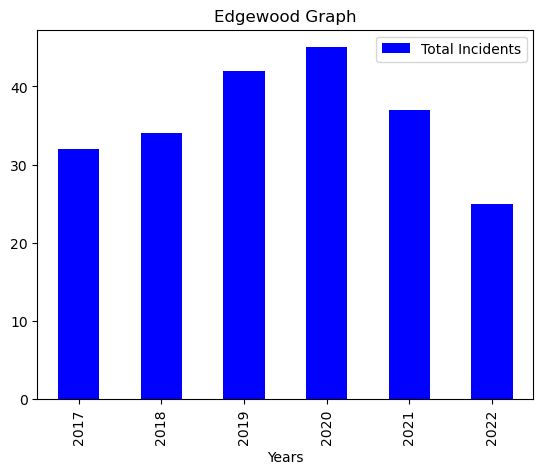

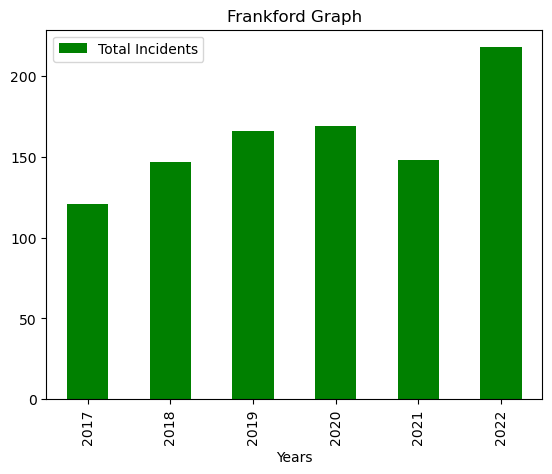

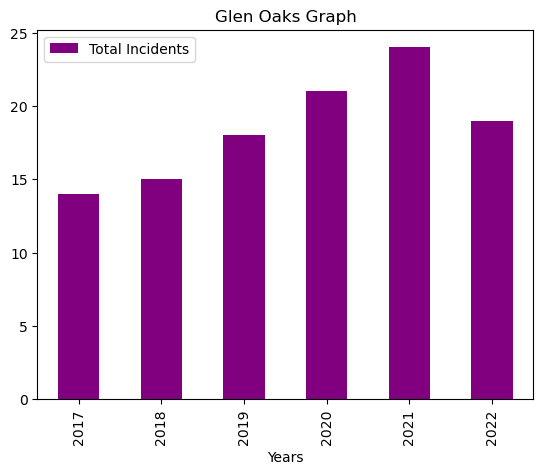

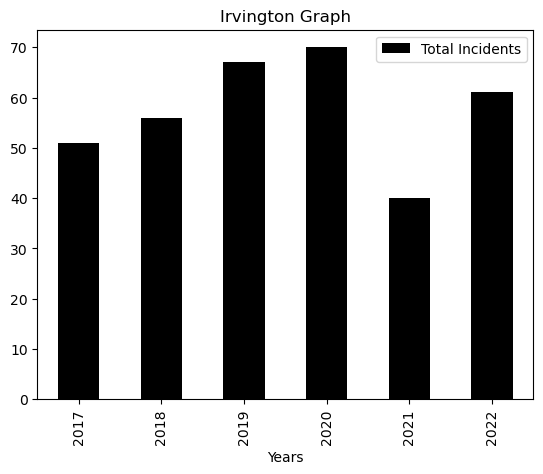

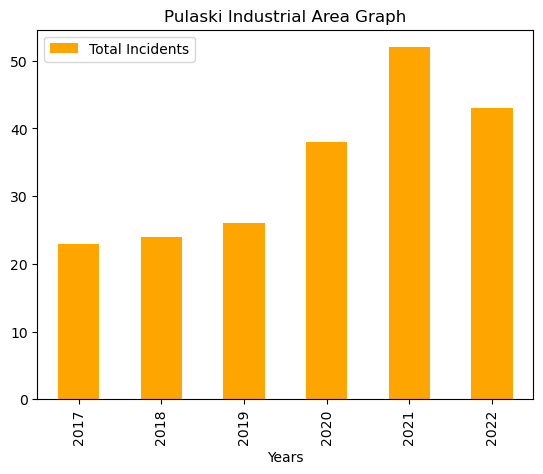

In [152]:
# Create a dataframe for every increasing neighborhood

df_edgewood = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Edgewood"]

df_frankford = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Frankford"]

df_glenoaks = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Glen oaks"]

df_irvington = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Irvington"]

df_pulaskiindustrialarea = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Pulaski industrial area"]


# Plot all the graph of the neighborhood

df_edgewood.plot(x="Years", y="Total Incidents", kind='bar', title="Edgewood Graph", color="blue")

df_frankford.plot(x="Years", y="Total Incidents",kind='bar', title="Frankford Graph", color="green")

df_glenoaks.plot(x="Years", y="Total Incidents",kind='bar', title="Glen Oaks Graph", color="purple")

df_irvington.plot(x="Years", y="Total Incidents",kind='bar', title="Irvington Graph", color="black")

df_pulaskiindustrialarea.plot(x="Years", y="Total Incidents",kind='bar', title="Pulaski Industrial Area Graph", color="Orange")



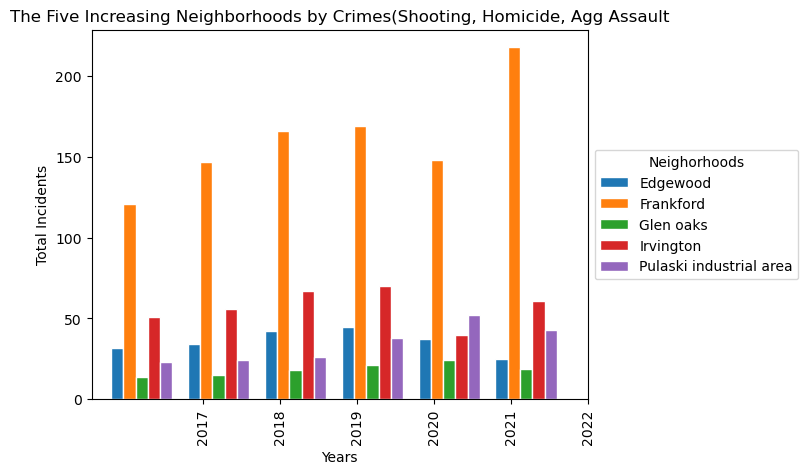

In [153]:
pivot_increasing_neighborhood = df_increasing_neighborhood.pivot(index='Years', columns='Neighborhood', values='Total Incidents')



pivot_increasing_neighborhood.plot(kind='bar', width=0.8, position=1.5, edgecolor='white')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Total Incidents')
plt.title('The Five Increasing Neighborhoods by Crimes(Shooting, Homicide, Agg Assault')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Neighorhoods', fontsize=10)

# Show the plot
plt.show()

In [154]:
pivot_increasing_neighborhood

Neighborhood,Edgewood,Frankford,Glen oaks,Irvington,Pulaski industrial area
Years,,,,,
2017,32,121,14,51,23
2018,34,147,15,56,24
2019,42,166,18,67,26
2020,45,169,21,70,38
2021,37,148,24,40,52
2022,25,218,19,61,43


## Decreasing Neighborhood

In [155]:
decreasing_results = []

def decreasing_fuction(tdarray):


    for i in range(273):

        arr = tdarray[:, i]

        if (arr[1] < arr[0]) and (arr[2] < arr[1]) and (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

           decreasing_results.append(6)

        elif (arr[2] < arr[1]) and (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

            decreasing_results.append(5)

        elif (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

            decreasing_results.append(4)
            
        elif (arr[4] < arr[3]) and (arr[5] < arr[4]):


            decreasing_results.append(3)
        
        elif (arr[5] < arr[4]):

            decreasing_results.append(3)
        
        else:
            decreasing_results.append(0)


decreasing_fuction(two_dimension_data)

In [156]:
indices_for_five_d = find_all_indices(decreasing_results, 5)

indices_for_four_d = find_all_indices(decreasing_results, 4)

indices_for_five_d, indices_for_four_d


([21, 66], [34, 123, 145, 153, 188, 195, 210])

In [157]:
# Extract the decreasing neighborhoods

decreasing_neighborhood = neighborhood[[21,66,34,123,145]]

print("The increasing neighborhood are: ", decreasing_neighborhood)

The increasing neighborhood are:  ['Bridgeview/greenlawn' 'Easterwood' 'Carroll-south hilton' 'Kresson'
 'Middle branch/reedbird parks']


In [158]:
# Dataframe for increaseing neighbourhoods

df_decreasing_neighborhood = groupData[groupData["Neighborhood"].isin(decreasing_neighborhood)].reset_index()

df_decreasing_neighborhood

,index,Years,Neighborhood,Total Incidents
0,21,2017,Bridgeview/greenlawn,32
1,34,2017,Carroll-south hilton,13
2,66,2017,Easterwood,18
3,123,2017,Kresson,16
4,145,2017,Middle branch/reedbird parks,13
5,276,2018,Bridgeview/greenlawn,34
6,289,2018,Carroll-south hilton,24
7,320,2018,Easterwood,24
8,379,2018,Kresson,8
9,399,2018,Middle branch/reedbird parks,19


<Axes: title={'center': 'Middle branch/reedbird parks Graph'}, xlabel='Years'>

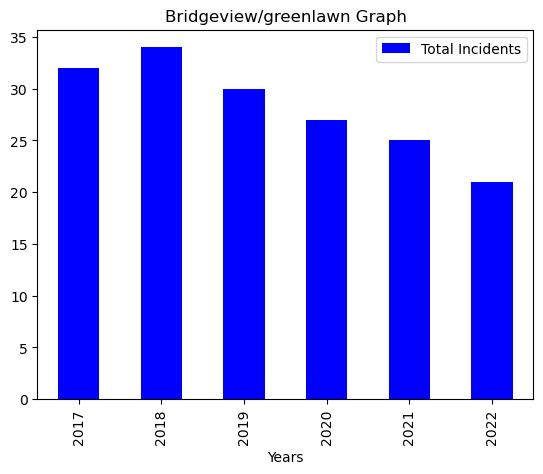

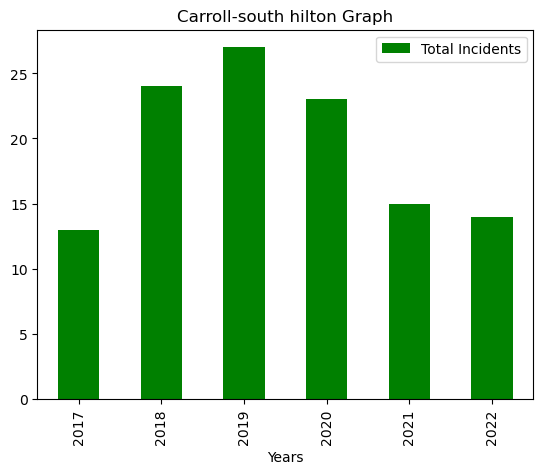

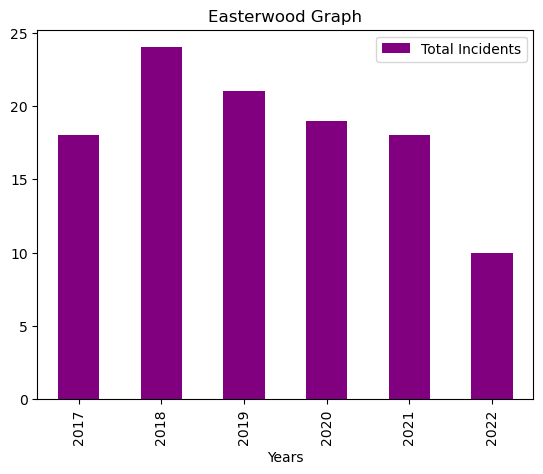

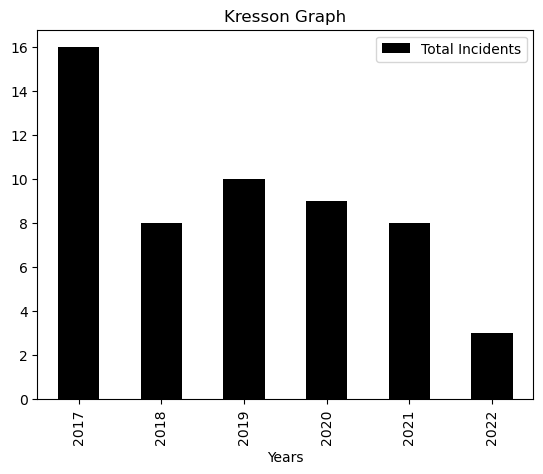

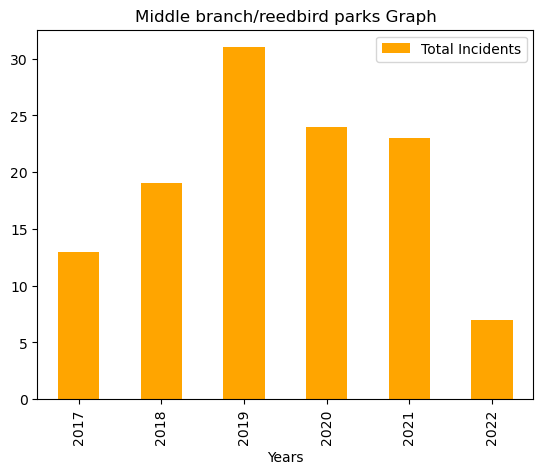

In [159]:
# Create a dataframe for every increasing neighborhood

df_bridgeviewgreenlawn = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Bridgeview/greenlawn"]

df_carrollsouthhilton = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Carroll-south hilton"]

df_easterwood = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Easterwood"]

df_kresson = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Kresson"]

df_middlebranchreedbirdparks = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Middle branch/reedbird parks"]


# Plot all the graph of the neighborhood

df_bridgeviewgreenlawn.plot(x="Years", y="Total Incidents", kind='bar', title="Bridgeview/greenlawn Graph", color="blue")

df_carrollsouthhilton.plot(x="Years", y="Total Incidents",kind='bar', title="Carroll-south hilton Graph", color="green")

df_easterwood.plot(x="Years", y="Total Incidents",kind='bar', title="Easterwood Graph", color="purple")

df_kresson.plot(x="Years", y="Total Incidents",kind='bar', title="Kresson Graph", color="black")

df_middlebranchreedbirdparks.plot(x="Years", y="Total Incidents",kind='bar', title="Middle branch/reedbird parks Graph", color="Orange")



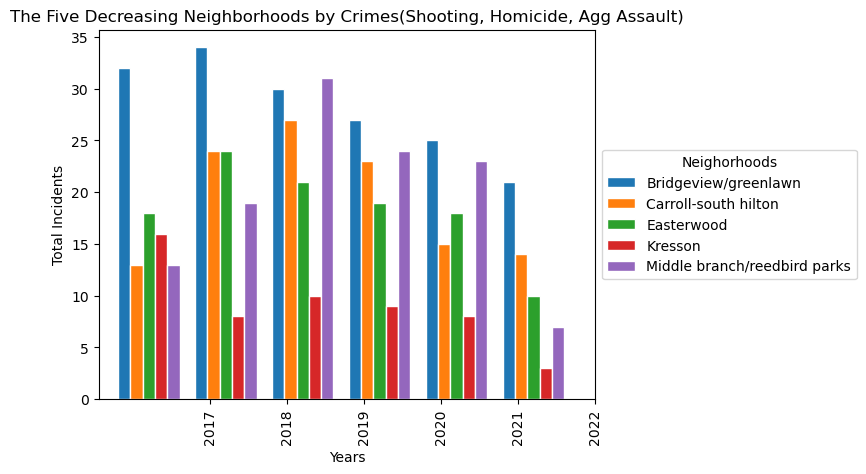

In [160]:
pivot_decreasing_neighborhood = df_decreasing_neighborhood.pivot(index='Years', columns='Neighborhood', values='Total Incidents')

pivot_decreasing_neighborhood.plot(kind='bar', width=0.8, position=1.5, edgecolor='white')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Total Incidents')
plt.title('The Five Decreasing Neighborhoods by Crimes(Shooting, Homicide, Agg Assault)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Neighorhoods', fontsize=10)

# Show the plot
plt.show()



In [161]:
pivot_decreasing_neighborhood

Neighborhood,Bridgeview/greenlawn,Carroll-south hilton,Easterwood,Kresson,Middle branch/reedbird parks
Years,,,,,
2017,32,13,18,16,13
2018,34,24,24,8,19
2019,30,27,21,10,31
2020,27,23,19,9,24
2021,25,15,18,8,23
2022,21,14,10,3,7


## Overview Findings

In [162]:
# Group the data by years

data_group_year = groupData.groupby("Years").sum().agg(list).reset_index()

/var/folders/m5/b50r4pmx5zj8lghnt1c4lmbh0000gn/T/ipykernel_56909/3655563592.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_group_year = groupData.groupby("Years").sum().agg(list).reset_index()


In [163]:
data_group_year

,Years,Total Incidents
0,2017,6800
1,2018,6525
2,2019,6740
3,2020,6311
4,2021,6676
5,2022,7132


In [164]:
total_incident_2017 = data_group_year[data_group_year["Years"] == "2017"]["Total Incidents"].values[0]
total_incident_2022 = data_group_year[data_group_year["Years"] == "2022"]["Total Incidents"].values[0]

In [165]:
# Differents of Incidents from 2017 - 2022 

difference_2017_2022 = total_incident_2022 - total_incident_2017

print("The difference between 2022 and 2017 in crimes (Shooting, Agg. Assalt and Homicide)  for all neighborhood is: ", difference_2017_2022 )

The difference between 2022 and 2017 in crimes (Shooting, Agg. Assalt and Homicide)  for all neighborhood is:  332


In [166]:
# Percentange change from 2017 to 2022

percentange_change = round(((total_incident_2022 - total_incident_2017) / (total_incident_2017)) * 100, 2)

print("The percentange change from 2017 to 2020 from crimes(Shooting, Agg. Assalt and Homicide) for all neighborhood is: ", percentange_change,"%")

The percentange change from 2017 to 2020 from crimes(Shooting, Agg. Assalt and Homicide) for all neighborhood is:  4.88 %


# Hypothesis Testing

### Common Dataset that will be used throughout 

In [167]:
# The neighborhood that the test will be dealing with.

print("Increasing neighborhoods: ", increasing_neighborhood)
print("Decreasing neighborhoods: ", decreasing_neighborhood)

Increasing neighborhoods:  ['Glen oaks' 'Pulaski industrial area' 'Edgewood' 'Frankford' 'Irvington']
Decreasing neighborhoods:  ['Bridgeview/greenlawn' 'Easterwood' 'Carroll-south hilton' 'Kresson'
 'Middle branch/reedbird parks']


In [168]:
#  Increasing and decreasing Dataset after melt 

df_pivot_increasing = pivot_increasing_neighborhood.reset_index()

melted_df_increasing_neighborhood = pd.melt(df_pivot_increasing, id_vars=['Years'], var_name='Neighborhood', value_name='Total Incidents')

df_pivot_decreasing = pivot_decreasing_neighborhood.reset_index()

melted_df_decreasing_neighborhood = pd.melt(df_pivot_decreasing, id_vars=['Years'], var_name='Neighborhood', value_name='Total Incidents')

In [169]:
# import dataset
df_vacant_building_notice = pd.read_csv("./Datasets/Vacant_Building_Notices.csv")
df_vacant_building_rehabs = pd.read_csv("./Datasets/Vacant_Building_Rehabs.csv")
df_gun_offenders = pd.read_csv("./Datasets/Gun_Offenders_Registry.csv")
df_bpd_arrests = pd.read_csv("./Datasets/BPD_Arrests.csv")


# import 311 calls
df_customer_call_2017 = pd.read_csv("./Datasets/311_Customer_Service_Requests_2017.csv")
df_customer_call_2018 = pd.read_csv("./Datasets/311_Customer_Service_Requests_2018.csv")
df_customer_call_2019 = pd.read_csv("./Datasets/311_Customer_Service_Requests_2019.csv")
df_customer_call_2020 = pd.read_csv("./Datasets/311_Customer_Service_Requests_2020.csv")


/var/folders/m5/b50r4pmx5zj8lghnt1c4lmbh0000gn/T/ipykernel_56909/187513521.py:10: DtypeWarning: Columns (14,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer_call_2018 = pd.read_csv("./Datasets/311_Customer_Service_Requests_2018.csv")
/var/folders/m5/b50r4pmx5zj8lghnt1c4lmbh0000gn/T/ipykernel_56909/187513521.py:11: DtypeWarning: Columns (16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer_call_2019 = pd.read_csv("./Datasets/311_Customer_Service_Requests_2019.csv")


### 1. Vacant Bulding Notice Analysis

In [170]:
df_vacant_building_notice.head()

,X,Y,OBJECTID,NoticeNum,DateNotice,DateCancel,DateAbate,NT,OWNER_ABBR,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address
0,1.411074e+06,598468.355480,723192,805231A,2012/01/25 15:37:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 003,2041 W NORTH AVE
1,1.411088e+06,598469.087434,723193,1780434A,2019/04/20 08:55:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 004,2039 W NORTH AVE
2,1.411131e+06,598471.043467,723196,927919A,2013/02/01 14:19:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 007,2033 W NORTH AVE
3,1.411144e+06,598471.677324,723197,2106499A,2022/05/13 16:20:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 008,2031 W NORTH AVE
4,1.411214e+06,598474.912882,723202,2078873A,2022/02/10 16:01:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 013,2021 W NORTH AVE


In [171]:
df_vacant_building_notice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13646 entries, 0 to 13645
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          13646 non-null  float64
 1   Y                          13646 non-null  float64
 2   OBJECTID                   13646 non-null  int64  
 3   NoticeNum                  13646 non-null  object 
 4   DateNotice                 13646 non-null  object 
 5   DateCancel                 0 non-null      float64
 6   DateAbate                  0 non-null      float64
 7   NT                         13646 non-null  object 
 8   OWNER_ABBR                 1075 non-null   object 
 9   HousingMarketTypology2017  13623 non-null  object 
 10  Council_District           13646 non-null  int64  
 11  Neighborhood               13646 non-null  object 
 12  BLOCKLOT                   13646 non-null  object 
 13  Address                    13646 non-null  obj

In [172]:
# Visualizing the object column

df_vacant_building_notice["Neighborhood"].unique()

array(['EASTERWOOD                               ',
       'SANDTOWN-WINCHESTER                      ',
       'MIDTOWN-EDMONDSON                        ',
       'BRIDGEVIEW/GREENLAWN                     ',
       'HARLEM PARK                              ',
       'PENROSE/FAYETTE STREET OUTREACH          ',
       'FRANKLIN SQUARE                          ',
       'POPPLETON                                ',
       'BOYD-BOOTH                               ',
       'UNION SQUARE                             ',
       'HOLLINS MARKET                           ',
       'SHIPLEY HILL                             ',
       'CARROLLTON RIDGE                         ',
       'NEW SOUTHWEST/MOUNT CLARE                ',
       'WASHINGTON VILLAGE/PIGTOWN               ',
       'MILLHILL                                 ',
       'PENN NORTH                               ',
       'DRUID HEIGHTS                            ',
       'UPTON                                    ',
       'MADI

In [173]:
df_vacant_building_notice.columns

Index(['X', 'Y', 'OBJECTID', 'NoticeNum', 'DateNotice', 'DateCancel',
       'DateAbate', 'NT', 'OWNER_ABBR', 'HousingMarketTypology2017',
       'Council_District', 'Neighborhood', 'BLOCKLOT', 'Address'],
      dtype='object')

In [174]:
# Drop the table that are not used
df_vacant_building_notice = df_vacant_building_notice.drop(['X', 'Y', 'OBJECTID', 'NoticeNum', 'DateCancel','DateAbate', 'NT', 'OWNER_ABBR', 'HousingMarketTypology2017',
       'Council_District', 'BLOCKLOT', 'Address'], axis=1)


In [175]:
# New column names
df_vacant_building_notice_newcolumns = {"DateNotice": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_vacant_building_notice["Neighborhood"] = df_vacant_building_notice["Neighborhood"].astype(str)
df_vacant_building_notice["Neighborhood"] = df_vacant_building_notice["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_vacant_building_notice['DateNotice'] = df_vacant_building_notice['DateNotice'].apply(lambda x: x[:4])

# Rename the columns names
df_vacant_building_notice = df_vacant_building_notice.rename(columns = df_vacant_building_notice_newcolumns)


In [176]:
# ['Loch raven', 'Lucille park', 'Northwest community action','Parklane', 'Stadium area']

In [177]:
# Visualizing the change of year and Neighborhood dataset
df_vacant_building_notice.head()

,Years,Neighborhood
0,2012,Easterwood
1,2019,Easterwood
2,2013,Easterwood
3,2022,Easterwood
4,2022,Easterwood


In [178]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_vacant_building_notice = df_vacant_building_notice[df_vacant_building_notice["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_vacant_building_notice_increasing = df_vacant_building_notice[df_vacant_building_notice["Neighborhood"].isin(increasing_neighborhood)]
df_vacant_building_notice_decreasing = df_vacant_building_notice[df_vacant_building_notice["Neighborhood"].isin(decreasing_neighborhood)]


df_vacant_building_notice_decreasing = df_vacant_building_notice_decreasing.reset_index(drop=True)
df_vacant_building_notice_increasing = df_vacant_building_notice_increasing.reset_index(drop=True)


In [179]:
# Visualize the dataset

df_vacant_building_notice_increasing

,Years,Neighborhood
0,2022,Irvington
1,2021,Irvington
2,2017,Irvington
3,2022,Irvington
4,2018,Irvington
...,...,...
59,2021,Frankford
60,2022,Frankford
61,2022,Frankford
62,2020,Frankford


In [180]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year

df_vacant_building_notice_increasing = (
    df_vacant_building_notice_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

df_vacant_building_notice_decreasing = (
    df_vacant_building_notice_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

In [181]:
df_vacant_building_notice_increasing

,Years,Neighborhood,Total Vacants
0,2017,Edgewood,1
1,2017,Frankford,1
2,2017,Irvington,3
3,2018,Edgewood,3
4,2018,Frankford,1
5,2018,Irvington,1
6,2019,Edgewood,6
7,2019,Frankford,1
8,2019,Irvington,3
9,2020,Edgewood,1


In [182]:
df_vacant_building_notice_decreasing

,Years,Neighborhood,Total Vacants
0,2017,Bridgeview/greenlawn,1
1,2017,Easterwood,13
2,2018,Bridgeview/greenlawn,2
3,2018,Easterwood,12
4,2019,Bridgeview/greenlawn,2
5,2019,Easterwood,18
6,2019,Kresson,1
7,2020,Bridgeview/greenlawn,1
8,2020,Easterwood,7
9,2021,Bridgeview/greenlawn,3


In [183]:
# You will find that not all the neighorhoods are in the grouped dataset only few of them are in the vacant dataset

print("The increasing neighborhoods after groupby: ", df_vacant_building_notice_increasing["Neighborhood"].unique())

print("The decreasing neighborhoods after groupby: ", df_vacant_building_notice_decreasing["Neighborhood"].unique())

The increasing neighborhoods after groupby:  ['Edgewood' 'Frankford' 'Irvington']
The decreasing neighborhoods after groupby:  ['Bridgeview/greenlawn' 'Easterwood' 'Kresson']


In [184]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Notice 

df_vacant_building_notice_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_vacant_building_notice_increasing, on=['Years', "Neighborhood"], how='inner')

df_vacant_building_notice_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_vacant_building_notice_decreasing, on=['Years', "Neighborhood"], how='inner')


In [185]:
df_vacant_building_notice_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Vacants
0,2017,Edgewood,32,1
1,2018,Edgewood,34,3
2,2019,Edgewood,42,6
3,2020,Edgewood,45,1
4,2021,Edgewood,37,6
5,2022,Edgewood,25,10
6,2017,Frankford,121,1
7,2018,Frankford,147,1
8,2019,Frankford,166,1
9,2020,Frankford,169,2


In [186]:
df_vacant_building_notice_and_crimecount_decrease

,Years,Neighborhood,Total Incidents,Total Vacants
0,2017,Bridgeview/greenlawn,32,1
1,2018,Bridgeview/greenlawn,34,2
2,2019,Bridgeview/greenlawn,30,2
3,2020,Bridgeview/greenlawn,27,1
4,2021,Bridgeview/greenlawn,25,3
5,2022,Bridgeview/greenlawn,21,4
6,2017,Easterwood,18,13
7,2018,Easterwood,24,12
8,2019,Easterwood,21,18
9,2020,Easterwood,19,7


### Hypothesis testing on vacant buliding notice on increase neighborhood combined per year

In [187]:
group_vacant_building_increase = df_vacant_building_notice_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_increase

,Total Incidents,Total Vacants
Years,,
2017,204,5
2018,237,5
2019,275,10
2020,284,5
2021,225,11
2022,304,28


In [188]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_increase)

print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes there.
p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Notice")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Notice")

Results: 
The chi-squared statistic : 24.978525600048314
The p-value for the significance test : 0.00014067036251190181
Degrees of freedom for the contingency table : 5
Expected frequencies for the table :
 [[200.60326428   8.39673572]
 [232.2774639    9.7225361 ]
 [273.54990584  11.45009416]
 [277.38920276  11.61079724]
 [226.51851852   9.48148148]
 [318.6616447   13.3383553 ]]
Reject the null hypothesis, there is a significant association on Vacation Building Notice


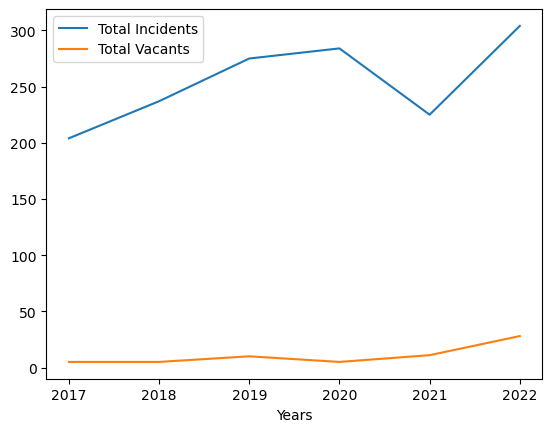

In [189]:
group_vacant_building_increase.plot()
plt.savefig('vacant_building_increase.png')
plt.show()

### Hypothesis testing on vacant buliding notice on decrease neighborhood combined per year

In [190]:
group_vacant_building_decrease = df_vacant_building_notice_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_decrease

,Total Incidents,Total Vacants
Years,,
2017,50,14
2018,58,14
2019,61,21
2020,46,8
2021,43,11
2022,34,22


In [191]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_decrease)


print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes here 

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Notice")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Notice")

Results: 
The chi-squared statistic : 11.257279160143018
The p-value for the significance test : 0.04651088687818055040
Degrees of freedom for the contingency table : 5
Expected frequencies for the table :
 [[48.92146597 15.07853403]
 [55.03664921 16.96335079]
 [62.68062827 19.31937173]
 [41.27748691 12.72251309]
 [41.27748691 12.72251309]
 [42.80628272 13.19371728]]
Reject the null hypothesis, there is a significant association on Vacation Building Notice


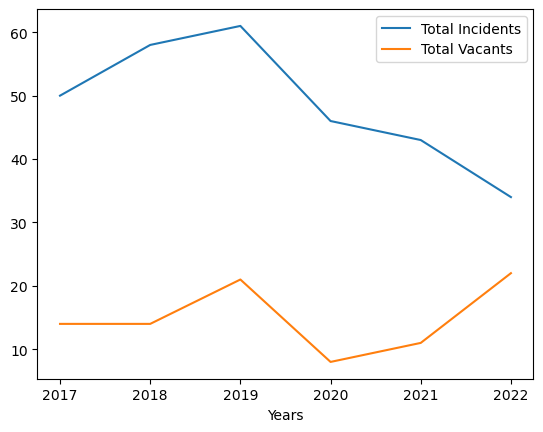

In [192]:
group_vacant_building_decrease.plot()
plt.savefig('vacant_building_decrease.png')
plt.show()

### 2. Vacant Building Rehabs Analysis

In [193]:
df_vacant_building_rehabs = pd.read_csv("./Datasets/Vacant_Building_Rehabs.csv")

In [194]:
df_vacant_building_rehabs.head()

,X,Y,OBJECTID,Block,Lot,PermitNum,VBN,DateIssue,DateIssued,ExistingUse,ProposedUse,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address,GlobalID
0,-8.532738e+06,4.766092e+06,1,0001,006,USE2022-52301,Y,2023/01/05 08:30:02+00,Jan 5 2023 8,3-42,3-50,I,7,EASTERWOOD,0001 006,2035 W NORTH AVE,ef8bf022-fa79-45ac-83a6-5c0ae2259544
1,-8.532650e+06,4.766018e+06,2,0001,029,USE2017-54344,Y,2018/01/03 13:30:02+00,Jan 3 2018 1,1-08,1-08,I,7,EASTERWOOD,0001 029,1804 N PAYSON ST,21b41e06-3515-49ed-90a4-bf826c07bd60
2,-8.532751e+06,4.766024e+06,3,0001,038,USE2019-55516,Y,2019/11/13 15:00:29+00,Nov 13 2019 3,1-08,1-08,I,7,EASTERWOOD,0001 038,1809 N PULASKI ST,dd1b140b-b0e4-472e-9ac3-64017543589b
3,-8.532454e+06,4.766108e+06,4,0002,016,USE2020-51648,Y,2020/06/16 07:30:21+00,Jun 16 2020 7,1-08,1-08,I,7,EASTERWOOD,0002 016,1903 W NORTH AVE,50c461ef-2804-4696-9d9c-2e5b9334bbd7
4,-8.532460e+06,4.766108e+06,5,0002,017,USE2017-54634,Y,2018/05/03 13:30:01+00,May 3 2018 1,1-08,1-08,I,7,EASTERWOOD,0002 017,1905 W NORTH AVE,1f9350b7-f4ee-4865-b564-2a29b27b1276


In [195]:
df_vacant_building_rehabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8944 entries, 0 to 8943
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          8944 non-null   float64
 1   Y                          8944 non-null   float64
 2   OBJECTID                   8944 non-null   int64  
 3   Block                      8944 non-null   object 
 4   Lot                        8944 non-null   object 
 5   PermitNum                  8944 non-null   object 
 6   VBN                        8944 non-null   object 
 7   DateIssue                  8944 non-null   object 
 8   DateIssued                 8944 non-null   object 
 9   ExistingUse                8944 non-null   object 
 10  ProposedUse                8944 non-null   object 
 11  HousingMarketTypology2017  8925 non-null   object 
 12  Council_District           8944 non-null   int64  
 13  Neighborhood               8944 non-null   objec

In [196]:
df_vacant_building_rehabs.columns

Index(['X', 'Y', 'OBJECTID', 'Block', 'Lot', 'PermitNum', 'VBN', 'DateIssue',
       'DateIssued', 'ExistingUse', 'ProposedUse', 'HousingMarketTypology2017',
       'Council_District', 'Neighborhood', 'BLOCKLOT', 'Address', 'GlobalID'],
      dtype='object')

In [197]:
# Drop the table that are not used
df_vacant_building_rehabs = df_vacant_building_rehabs.drop(['X', 'Y', 'OBJECTID', 'Block', 'Lot', 'PermitNum', 'VBN',
       'DateIssued', 'ExistingUse', 'ProposedUse', 'HousingMarketTypology2017',
       'Council_District',  'BLOCKLOT', 'Address', 'GlobalID'], axis=1)

In [198]:
df_vacant_building_rehabs["Neighborhood"].unique()

array(['EASTERWOOD                               ',
       'SANDTOWN-WINCHESTER                      ',
       'BRIDGEVIEW/GREENLAWN                     ',
       'MIDTOWN-EDMONDSON                        ',
       'HARLEM PARK                              ',
       'PENROSE/FAYETTE STREET OUTREACH          ',
       'FRANKLIN SQUARE                          ',
       'POPPLETON                                ',
       'BOYD-BOOTH                               ',
       'UNION SQUARE                             ',
       'HOLLINS MARKET                           ',
       'CARROLLTON RIDGE                         ',
       'BARRE CIRCLE                             ',
       'NEW SOUTHWEST/MOUNT CLARE                ',
       'WASHINGTON VILLAGE/PIGTOWN               ',
       'MILLHILL                                 ',
       'PENN NORTH                               ',
       'DRUID HEIGHTS                            ',
       'UPTON                                    ',
       'MADI

In [199]:
# New column names
df_vacant_building_rehabs_newcolumns = {"DateIssue": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_vacant_building_rehabs["Neighborhood"] = df_vacant_building_rehabs["Neighborhood"].astype(str)
df_vacant_building_rehabs["Neighborhood"] = df_vacant_building_rehabs["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_vacant_building_rehabs["DateIssue"] = df_vacant_building_rehabs["DateIssue"].astype(str)
df_vacant_building_rehabs['DateIssue'] = df_vacant_building_rehabs['DateIssue'].apply(lambda x: x[:4])

# Rename the columns names
df_vacant_building_rehabs = df_vacant_building_rehabs.rename(columns = df_vacant_building_rehabs_newcolumns)

In [200]:
df_vacant_building_rehabs

,Years,Neighborhood
0,2023,Easterwood
1,2018,Easterwood
2,2019,Easterwood
3,2020,Easterwood
4,2018,Easterwood
...,...,...
8939,2023,West
8940,2019,West
8941,2016,West
8942,2015,West


In [201]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_vacant_building_rehabs = df_vacant_building_rehabs[df_vacant_building_rehabs["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_vacant_building_rehabs_increasing = df_vacant_building_rehabs[df_vacant_building_rehabs["Neighborhood"].isin(increasing_neighborhood)]
df_vacant_building_rehabs_decreasing = df_vacant_building_rehabs[df_vacant_building_rehabs["Neighborhood"].isin(decreasing_neighborhood)]


df_vacant_building_rehabs_decreasing = df_vacant_building_rehabs_decreasing.reset_index(drop=True)
df_vacant_building_rehabs_increasing = df_vacant_building_rehabs_increasing.reset_index(drop=True)

In [202]:
df_vacant_building_rehabs_increasing.Neighborhood.unique()

array(['Irvington', 'Edgewood', 'Frankford'], dtype=object)

In [203]:
df_vacant_building_rehabs_decreasing.Neighborhood.unique()

array(['Easterwood', 'Bridgeview/greenlawn', 'Kresson'], dtype=object)

In [204]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year

df_vacant_building_rehabs_increasing = (
    df_vacant_building_rehabs_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

df_vacant_building_rehabs_decreasing = (
    df_vacant_building_rehabs_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

In [205]:
df_vacant_building_rehabs_decreasing

,Years,Neighborhood,Total Vacants
0,2017,Bridgeview/greenlawn,5
1,2017,Easterwood,3
2,2018,Bridgeview/greenlawn,6
3,2018,Easterwood,4
4,2018,Kresson,2
5,2019,Bridgeview/greenlawn,10
6,2019,Easterwood,5
7,2019,Kresson,2
8,2020,Bridgeview/greenlawn,2
9,2020,Easterwood,4


In [206]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Rehabs

df_vacant_building_rehabs_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_vacant_building_rehabs_increasing, on=['Years', "Neighborhood"], how='inner')

df_vacant_building_rehabs_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_vacant_building_rehabs_decreasing, on=['Years', "Neighborhood"], how='inner')

In [207]:
df_vacant_building_rehabs_and_crimecount_decrease

,Years,Neighborhood,Total Incidents,Total Vacants
0,2017,Bridgeview/greenlawn,32,5
1,2018,Bridgeview/greenlawn,34,6
2,2019,Bridgeview/greenlawn,30,10
3,2020,Bridgeview/greenlawn,27,2
4,2021,Bridgeview/greenlawn,25,5
5,2022,Bridgeview/greenlawn,21,5
6,2017,Easterwood,18,3
7,2018,Easterwood,24,4
8,2019,Easterwood,21,5
9,2020,Easterwood,19,4


### Hypothesis testing on vacant buliding rehabs on decrease neighborhood combined per year

In [208]:
# Group the dataset 
group_vacant_building_rehabs_increase = df_vacant_building_rehabs_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_rehabs_increase

,Total Incidents,Total Vacants
Years,,
2017,204,48
2018,237,35
2019,275,23
2020,284,26
2021,225,24
2022,304,20


In [209]:
# Testing on the increasing part 

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_rehabs_increase)

#print("Result: ", chi2_stat, p_val, dof)
print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes here 

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Results: 
The chi-squared statistic : 32.21797371623741
The p-value for the significance test : 0.00000537900899020151
Degrees of freedom for the contingency table : 5
Expected frequencies for the table :
 [[225.98709677  26.01290323]
 [243.92258065  28.07741935]
 [267.23870968  30.76129032]
 [278.          32.        ]
 [223.29677419  25.70322581]
 [290.55483871  33.44516129]]
Reject the null hypothesis, there is a significant association on Vacation Building Rehabs


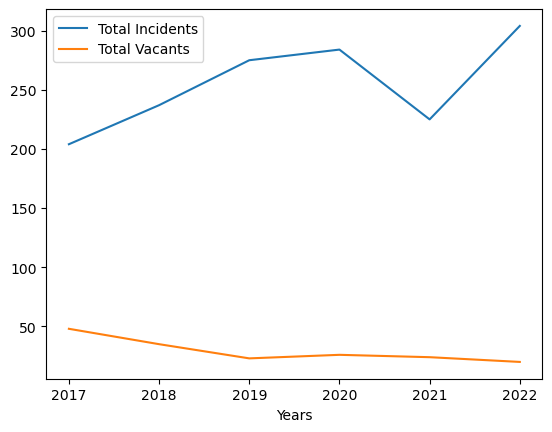

In [210]:
group_vacant_building_rehabs_increase.plot()
plt.savefig('vacant_building_rehabs_increase.png')
plt.show()

### Hypothesis testing on vacant buliding Rehabs on decrease neighborhood combined per year

In [211]:
# Group the dataset 
group_vacant_building_rehabs_decrease = df_vacant_building_rehabs_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_rehabs_decrease

,Total Incidents,Total Vacants
Years,,
2017,50,8
2018,66,12
2019,61,17
2020,55,8
2021,43,13
2022,31,12


In [212]:
# Testing on the decreasing part 

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_rehabs_increase)

#print("Result: ", chi2_stat, p_val, dof)
print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes here 
p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Results: 
The chi-squared statistic : 32.21797371623741
The p-value for the significance test : 0.00000537900899020151
Degrees of freedom for the contingency table : 5
Expected frequencies for the table :
 [[225.98709677  26.01290323]
 [243.92258065  28.07741935]
 [267.23870968  30.76129032]
 [278.          32.        ]
 [223.29677419  25.70322581]
 [290.55483871  33.44516129]]
Reject the null hypothesis, there is a significant association on Vacation Building Rehabs


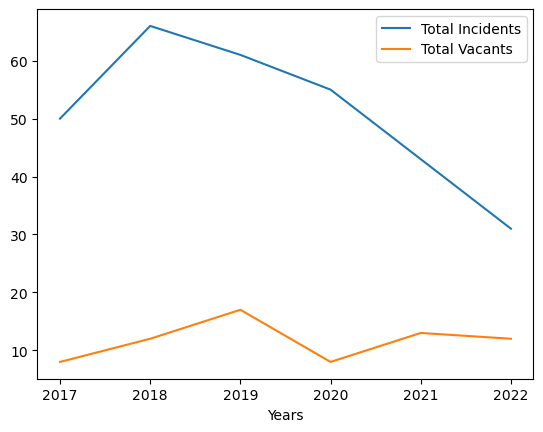

In [213]:
group_vacant_building_rehabs_decrease.plot()
plt.savefig('vacant_building_rehabs_decrease.png')
plt.show()

### 3. Gun Offenders Registry Analysis

In [214]:
df_gun_offenders = pd.read_csv("./Datasets/Gun_Offenders_Registry.csv")

In [215]:
df_gun_offenders.head()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,...,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,GlobalID
0,1.407179e+06,599063.663408,1,23-0399,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Bullock,Aniyja,NaN,2002/05/10 00:00:00+00,...,Baltimore,Md,21216.0,Western,731.0,Walbrook,39.3111,-76.6648,"(39.3111,-76.6648)",1bce1b2f-22bd-45b1-94a1-ab84c5e96c4f
1,NaN,NaN,2,23-0398,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Harper,Kamonte,Kaireem,1975/09/10 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",576f2d18-d902-4547-adbf-55415ccf1835
2,1.406444e+06,598951.702849,3,23-0397,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Mason,Duwan,Lamont,1998/06/11 00:00:00+00,...,Baltimore,Md,21216.0,Southwest,811.0,Walbrook,39.3108,-76.6674,"(39.3108,-76.6674)",de5cae18-b61e-4115-bd9e-72c90ca88360
3,1.402451e+06,591907.706139,4,23-0396,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Edison,Malik,NaN,1998/06/13 00:00:00+00,...,Baltimore,Md,21229.0,Southwest,824.0,Allendale,39.2915,-76.6816,"(39.2915,-76.6816)",c44d98df-a356-4bda-af04-9ea9b31e18eb
4,NaN,NaN,5,23-0395,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Johnson,Kristopher,NaN,1988/03/20 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",69a4c17a-867f-40fe-99bb-1109d6146c8f


In [216]:
df_gun_offenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             3034 non-null   float64
 1   Y             3034 non-null   float64
 2   RowID         3494 non-null   int64  
 3   CaseNumber    3494 non-null   object 
 4   CreatedDate   3494 non-null   object 
 5   ModifiedDate  3494 non-null   object 
 6   LastName      3494 non-null   object 
 7   FirstName     3494 non-null   object 
 8   MiddleName    576 non-null    object 
 9   DateOfBirth   3494 non-null   object 
 10  Gender        3494 non-null   object 
 11  Race          3494 non-null   object 
 12  FullAddress   3034 non-null   object 
 13  City          3034 non-null   object 
 14  State         3034 non-null   object 
 15  ZipCode       3013 non-null   float64
 16  District      2735 non-null   object 
 17  Post          2735 non-null   float64
 18  Neighborhood  2735 non-null 

In [217]:
df_gun_offenders.columns

Index(['X', 'Y', 'RowID', 'CaseNumber', 'CreatedDate', 'ModifiedDate',
       'LastName', 'FirstName', 'MiddleName', 'DateOfBirth', 'Gender', 'Race',
       'FullAddress', 'City', 'State', 'ZipCode', 'District', 'Post',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'GlobalID'],
      dtype='object')

In [218]:
df_gun_offenders = df_gun_offenders.drop(['X', 'Y', 'RowID', 'CaseNumber', 'ModifiedDate',
       'LastName', 'FirstName', 'MiddleName', 'DateOfBirth', 'Gender', 'Race',
       'FullAddress', 'City', 'State', 'ZipCode', 'District', 'Post',
        'Latitude', 'Longitude', 'GeoLocation', 'GlobalID'], axis=1)

In [219]:
df_gun_offenders

,CreatedDate,Neighborhood
0,2023/06/09 00:00:00+00,Walbrook
1,2023/06/09 00:00:00+00,NaN
2,2023/06/08 00:00:00+00,Walbrook
3,2023/06/08 00:00:00+00,Allendale
4,2023/06/08 00:00:00+00,NaN
...,...,...
3489,2021/10/31 00:00:00+00,NaN
3490,2021/10/31 00:00:00+00,Washington Village/Pigtown
3491,2021/10/31 00:00:00+00,Greenspring
3492,2021/10/31 00:00:00+00,East Baltimore Midway


In [220]:
# New column names
df_gun_offenders_newcolumns = {"CreatedDate": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_gun_offenders["Neighborhood"] = df_gun_offenders["Neighborhood"].astype(str)
df_gun_offenders["Neighborhood"] = df_gun_offenders["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_gun_offenders['CreatedDate'] = df_gun_offenders['CreatedDate'].apply(lambda x: x[:4])

# Rename the columns names
df_gun_offenders = df_gun_offenders.rename(columns =df_gun_offenders_newcolumns)

In [221]:
df_gun_offenders

,Years,Neighborhood
0,2023,Walbrook
1,2023,Nan
2,2023,Walbrook
3,2023,Allendale
4,2023,Nan
...,...,...
3489,2021,Nan
3490,2021,Washington
3491,2021,Greenspring
3492,2021,East


In [222]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_gun_offenders = df_gun_offenders[df_gun_offenders["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]

# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_gun_offenders_increasing = df_gun_offenders[df_gun_offenders["Neighborhood"].isin(increasing_neighborhood)]
df_gun_offenders_decreasing = df_gun_offenders[df_gun_offenders["Neighborhood"].isin(decreasing_neighborhood)]

df_gun_offenders_increasing = df_gun_offenders_increasing.reset_index(drop=True)
df_gun_offenders_decreasing = df_gun_offenders_decreasing.reset_index(drop=True)

In [223]:
df_gun_offenders_increasing.Neighborhood.unique()

array(['Irvington', 'Frankford', 'Edgewood'], dtype=object)

In [224]:
df_gun_offenders_decreasing.Neighborhood.unique()

array(['Easterwood', 'Bridgeview/greenlawn', 'Kresson'], dtype=object)

In [225]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year
df_gun_offenders_increasing = (
    df_gun_offenders_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Gun Offenders')
    .groupby(['Years', 'Neighborhood'])['Total Gun Offenders']
    .sum()
    .reset_index()
)

df_gun_offenders_decreasing= (
    df_gun_offenders_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Gun Offenders')
    .groupby(['Years', 'Neighborhood'])['Total Gun Offenders']
    .sum()
    .reset_index()
)

In [226]:
df_gun_offenders_increasing

,Years,Neighborhood,Total Gun Offenders
0,2017,Edgewood,1
1,2017,Frankford,4
2,2017,Irvington,2
3,2018,Edgewood,2
4,2018,Frankford,6
5,2018,Irvington,1
6,2019,Frankford,6
7,2019,Irvington,7
8,2020,Edgewood,1
9,2020,Frankford,8


In [227]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Rehabs

df_gun_offenders_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_gun_offenders_increasing, on=['Years', "Neighborhood"], how='inner')

df_gun_offenders_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_gun_offenders_decreasing, on=['Years', "Neighborhood"], how='inner')

In [228]:
df_gun_offenders_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Gun Offenders
0,2017,Edgewood,32,1
1,2018,Edgewood,34,2
2,2020,Edgewood,45,1
3,2021,Edgewood,37,2
4,2022,Edgewood,25,9
5,2017,Frankford,121,4
6,2018,Frankford,147,6
7,2019,Frankford,166,6
8,2020,Frankford,169,8
9,2021,Frankford,148,23


In [229]:
df_gun_offenders_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Gun Offenders
0,2017,Edgewood,32,1
1,2018,Edgewood,34,2
2,2020,Edgewood,45,1
3,2021,Edgewood,37,2
4,2022,Edgewood,25,9
5,2017,Frankford,121,4
6,2018,Frankford,147,6
7,2019,Frankford,166,6
8,2020,Frankford,169,8
9,2021,Frankford,148,23


### Hypothesis testing on Gun Offenders on increase neighborhood combined per year

In [230]:
# Group the dataset 
group_gun_offenders_increase = df_gun_offenders_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Gun Offenders"]].sum()
group_gun_offenders_increase

,Total Incidents,Total Gun Offenders
Years,,
2017,204,7
2018,237,9
2019,233,13
2020,284,13
2021,225,31
2022,304,48


In [231]:
#Testing on the increasing part 

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_gun_offenders_increase)

#print("Result: ", chi2_stat, p_val, dof)
print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes here 

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Gun Offenders")
else:
    print("Fail to reject the null hypothesis, no significant association on Gun Offenders")

Results: 
The chi-squared statistic : 43.2810626664774
The p-value for the significance test : 0.00000003240735768296
Degrees of freedom for the contingency table : 5
Expected frequencies for the table :
 [[195.12251244  15.87748756]
 [227.48880597  18.51119403]
 [227.48880597  18.51119403]
 [274.6511194   22.3488806 ]
 [236.73631841  19.26368159]
 [325.51243781  26.48756219]]
Reject the null hypothesis, there is a significant association on Gun Offenders


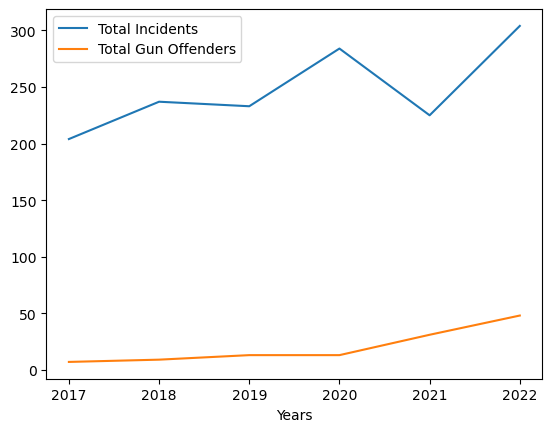

In [232]:
group_gun_offenders_increase.plot()
plt.savefig('gun_offenders_increase.png')
plt.show()

### Hypothesis testing on Gun Offenders on Decrease neighborhood combined per year

In [233]:
# Group the dataset 
group_gun_offenders_decrease = df_gun_offenders_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Gun Offenders"]].sum()
group_gun_offenders_decrease

,Total Incidents,Total Gun Offenders
Years,,
2018,24,3
2019,51,4
2020,9,2
2021,51,9
2022,31,11


In [234]:
#Testing on the increasing part 

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_gun_offenders_decrease)

#print("Result: ", chi2_stat, p_val, dof)
print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes here 

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Gun Offenders")
else:
    print("Fail to reject the null hypothesis, no significant association on Gun Offenders")

Results: 
The chi-squared statistic : 7.156430244039301
The p-value for the significance test : 0.12784893450826245731
Degrees of freedom for the contingency table : 4
Expected frequencies for the table :
 [[22.98461538  4.01538462]
 [46.82051282  8.17948718]
 [ 9.36410256  1.63589744]
 [51.07692308  8.92307692]
 [35.75384615  6.24615385]]
Fail to reject the null hypothesis, no significant association on Gun Offenders


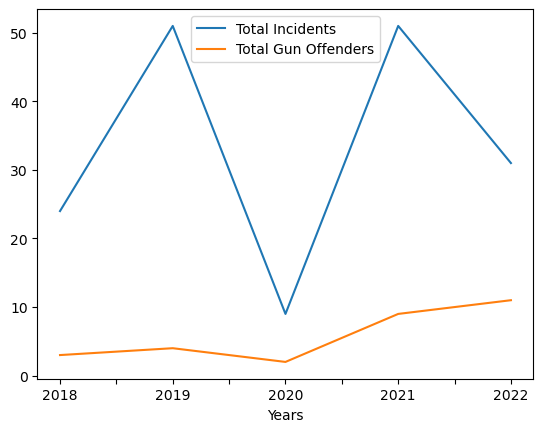

In [235]:
group_gun_offenders_decrease.plot()
plt.savefig('gun_offenders_decrease.png')
plt.show()

### 4.BPD Arrest Analysis

In [236]:
df_bpd_arrests = pd.read_csv("./Datasets/BPD_Arrests.csv")

In [237]:
df_bpd_arrests.head()

,X,Y,RowID,IncidentNumber,ArrestNumber,Age,Gender,Race,ArrestDateTime,ArrestLocation,...,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
0,1.401347e+06,608148.870493,1,22L09338,23000037.0,39.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,...,4000 OAKFORD ST,1 0692,HGV,Northwest,621.0,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",NaN
1,1.401347e+06,608148.870493,2,22L09338,23000039.0,50.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,...,4000 OAKFORD ST,1 0692,HGV,Northwest,621.0,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",NaN
2,NaN,NaN,3,NaN,23000010.0,27.0,M,B,2022/12/31 23:40:00+00,NaN,...,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,"(,)",NaN
3,1.417636e+06,595206.835862,4,22L09343,23000050.0,42.0,M,B,2022/12/31 23:15:00+00,500 DOLPHIN ST,...,500 DOLPHIN ST,1 0692,HGV,Central,123.0,Upton,39.3004,-76.6279,"(39.3004,-76.6279)",NaN
4,NaN,NaN,5,22L09312,22157183.0,43.0,F,W,2022/12/31 21:00:00+00,1500 BECKLOW AVE,...,1500 BECKLOW AVE,2 0480,STOLEN AUTO,NaN,NaN,NaN,NaN,NaN,"(,)",NaN


In [238]:
df_bpd_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367715 entries, 0 to 367714
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  224940 non-null  float64
 1   Y                  224940 non-null  float64
 2   RowID              367715 non-null  int64  
 3   IncidentNumber     226597 non-null  object 
 4   ArrestNumber       351216 non-null  float64
 5   Age                367582 non-null  float64
 6   Gender             367681 non-null  object 
 7   Race               367634 non-null  object 
 8   ArrestDateTime     367715 non-null  object 
 9   ArrestLocation     230166 non-null  object 
 10  IncidentOffence    367715 non-null  object 
 11  IncidentLocation   230166 non-null  object 
 12  Charge             319813 non-null  object 
 13  ChargeDescription  367715 non-null  object 
 14  District           216942 non-null  object 
 15  Post               216942 non-null  float64
 16  Ne

In [239]:
df_bpd_arrests.columns

Index(['X', 'Y', 'RowID', 'IncidentNumber', 'ArrestNumber', 'Age', 'Gender',
       'Race', 'ArrestDateTime', 'ArrestLocation', 'IncidentOffence',
       'IncidentLocation', 'Charge', 'ChargeDescription', 'District', 'Post',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'Shape'],
      dtype='object')

In [240]:
df_bpd_arrests = df_bpd_arrests.drop(['X', 'Y', 'RowID', 'IncidentNumber', 'ArrestNumber', 'Age', 'Gender',
       'Race', 'ArrestLocation', 'IncidentOffence',
       'IncidentLocation', 'Charge', 'ChargeDescription', 'District', 'Post',
    'Latitude', 'Longitude', 'GeoLocation', 'Shape'], axis=1)

In [241]:
df_bpd_arrests

,ArrestDateTime,Neighborhood
0,2022/12/31 23:50:00+00,West Arlington
1,2022/12/31 23:50:00+00,West Arlington
2,2022/12/31 23:40:00+00,NaN
3,2022/12/31 23:15:00+00,Upton
4,2022/12/31 21:00:00+00,NaN
...,...,...
367710,2010/01/01 00:05:00+00,Park Circle
367711,2010/01/01 00:05:00+00,Lower Herring Run Park
367712,2010/01/01 00:01:00+00,Edmondson Village
367713,2010/01/01 00:01:00+00,South Clifton Park


In [242]:
# New column names
df_bpd_arrests_newcolumns = {"ArrestDateTime": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_bpd_arrests["Neighborhood"] = df_bpd_arrests["Neighborhood"].astype(str)
df_bpd_arrests["Neighborhood"] = df_bpd_arrests["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_bpd_arrests['ArrestDateTime'] = df_bpd_arrests['ArrestDateTime'].apply(lambda x: x[:4])

# Rename the columns names
df_bpd_arrests = df_bpd_arrests.rename(columns = df_bpd_arrests_newcolumns)

In [243]:
df_bpd_arrests

,Years,Neighborhood
0,2022,West
1,2022,West
2,2022,Nan
3,2022,Upton
4,2022,Nan
...,...,...
367710,2010,Park
367711,2010,Lower
367712,2010,Edmondson
367713,2010,South


In [244]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_bpd_arrests = df_bpd_arrests[df_bpd_arrests["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]

# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_bpd_arrests_increasing = df_bpd_arrests[df_bpd_arrests["Neighborhood"].isin(increasing_neighborhood)]
df_bpd_arrests_decreasing = df_bpd_arrests[df_bpd_arrests["Neighborhood"].isin(decreasing_neighborhood)]

df_bpd_arrests_increasing = df_bpd_arrests_increasing.reset_index(drop=True)
df_bpd_arrests_decreasing = df_bpd_arrests_decreasing.reset_index(drop=True)

In [245]:
df_bpd_arrests_increasing.Neighborhood.unique()

array(['Frankford', 'Irvington', 'Edgewood'], dtype=object)

In [246]:
df_bpd_arrests_decreasing.Neighborhood.unique()

array(['Kresson', 'Bridgeview/greenlawn', 'Easterwood'], dtype=object)

In [247]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year
df_bpd_arrests_increasing = (
    df_bpd_arrests_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Arrests')
    .groupby(['Years', 'Neighborhood'])['Total Arrests']
    .sum()
    .reset_index()
)

df_bpd_arrests_decreasing = (
    df_bpd_arrests_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Arrests')
    .groupby(['Years', 'Neighborhood'])['Total Arrests']
    .sum()
    .reset_index()
)

In [248]:
df_bpd_arrests_increasing

,Years,Neighborhood,Total Arrests
0,2017,Edgewood,23
1,2017,Frankford,196
2,2017,Irvington,45
3,2018,Edgewood,36
4,2018,Frankford,161
5,2018,Irvington,64
6,2019,Edgewood,36
7,2019,Frankford,160
8,2019,Irvington,53
9,2020,Edgewood,25


In [249]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Rehabs

df_bdp_arrests_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_bpd_arrests_increasing, on=['Years', "Neighborhood"], how='inner')

df_bdp_arrests_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_bpd_arrests_decreasing, on=['Years', "Neighborhood"], how='inner')

In [250]:
df_bdp_arrests_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Arrests
0,2017,Edgewood,32,23
1,2018,Edgewood,34,36
2,2019,Edgewood,42,36
3,2020,Edgewood,45,25
4,2021,Edgewood,37,18
5,2022,Edgewood,25,8
6,2017,Frankford,121,196
7,2018,Frankford,147,161
8,2019,Frankford,166,160
9,2020,Frankford,169,132


In [251]:
df_bdp_arrests_and_crimecount_decrease

,Years,Neighborhood,Total Incidents,Total Arrests
0,2017,Bridgeview/greenlawn,32,36
1,2018,Bridgeview/greenlawn,34,45
2,2019,Bridgeview/greenlawn,30,27
3,2020,Bridgeview/greenlawn,27,24
4,2021,Bridgeview/greenlawn,25,27
5,2022,Bridgeview/greenlawn,21,30
6,2017,Easterwood,18,38
7,2018,Easterwood,24,27
8,2019,Easterwood,21,10
9,2020,Easterwood,19,16


### Hypothesis testing on BDP Arrests on increase neighborhood combined per year

In [252]:
# Group the dataset 
group_bdp_arrests_increase = df_bdp_arrests_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Arrests"]].sum()
group_bdp_arrests_increase

,Total Incidents,Total Arrests
Years,,
2017,204,264
2018,237,261
2019,275,249
2020,284,202
2021,225,160
2022,304,136


In [253]:
#Testing on the increasing part 
chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_bdp_arrests_increase)

#print("Result: ", chi2_stat, p_val, dof)
print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes here 

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on BDP Arrests")
else:
    print("Fail to reject the null hypothesis, no significant association on BDP Arrests")

Results: 
The chi-squared statistic : 76.15448945062519
The p-value for the significance test : 0.00000000000000534095
Degrees of freedom for the contingency table : 5
Expected frequencies for the table :
 [[255.47018922 212.52981078]
 [271.8464834  226.1535166 ]
 [286.03927169 237.96072831]
 [265.29596573 220.70403427]
 [210.16244199 174.83755801]
 [240.18564798 199.81435202]]
Reject the null hypothesis, there is a significant association on BDP Arrests


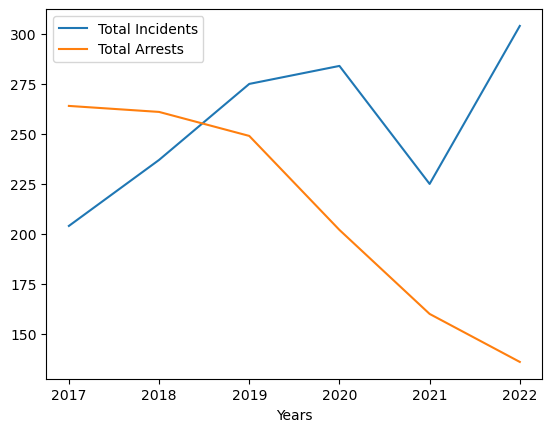

In [254]:
group_bdp_arrests_increase.plot()
plt.savefig('bdp_arrests_increase.png')
plt.show()

### Hypothesis testing on BDP Arrests on decrease neighborhood combined per year

In [255]:
# Group the dataset 
group_bdp_arrests_decrease = df_bdp_arrests_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Arrests"]].sum()
group_bdp_arrests_decrease

,Total Incidents,Total Arrests
Years,,
2017,66,101
2018,66,92
2019,61,56
2020,55,45
2021,51,49
2022,34,42


In [256]:
#Testing on the increasing part 

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_bdp_arrests_decrease)

#print("Result: ", chi2_stat, p_val, dof)
print("Results: ")
print('The chi-squared statistic :',chi2_stat)
print('The p-value for the significance test :',"{:0.20f}".format(p_val))
print('Degrees of freedom for the contingency table :',dof)
print('Expected frequencies for the table :\n',ex)

# If statements goes here 

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on BDP Arrests")
else:
    print("Fail to reject the null hypothesis, no significant association on BDP Arrests")

Results: 
The chi-squared statistic : 9.996004647755207
The p-value for the significance test : 0.07534853186067959341
Degrees of freedom for the contingency table : 5
Expected frequencies for the table :
 [[77.45264624 89.54735376]
 [73.27855153 84.72144847]
 [54.2632312  62.7367688 ]
 [46.37883008 53.62116992]
 [46.37883008 53.62116992]
 [35.24791086 40.75208914]]
Fail to reject the null hypothesis, no significant association on BDP Arrests


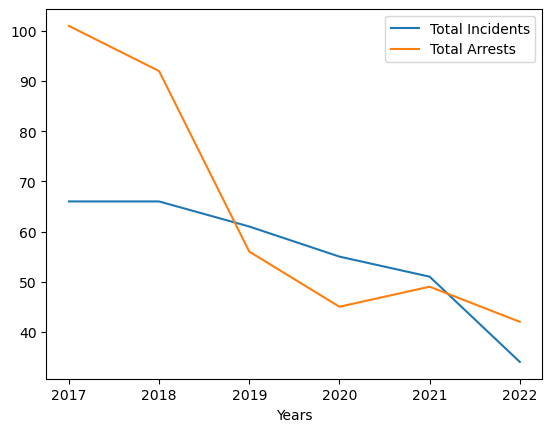

In [257]:
group_bdp_arrests_decrease.plot()
plt.savefig('bdp_arrests_decrease.png')
plt.show()